In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from numpy import unique, where
import matplotlib.pyplot as plt

import os
os.chdir('../../')

from modules import preproc
from modules.join_data import join_y
from modules import feature_eng
from modules import cluster_intelligence
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',1000)

In [2]:
print(os.getcwd())

c:\Users\Rory\Desktop\projects\expenditure_prox


## Reading in data and preproc

In [33]:
# laptops
laptops = pd.read_json('full_data/laptops.json')
laptops = join_y(laptops, 'raw_data/laptops_sales.csv')
laptops = preproc.clean_cols(laptops)
laptops = preproc.fill_empty_lists(laptops)
laptops = preproc.preprocess_reviews(laptops)
laptops = feature_eng.generate_features(laptops)
laptops = feature_eng.do_PCA(laptops)
laptops['TOTAL_SALES_QBINNED'] = pd.qcut(laptops['TOTAL_SALES'], 3, labels=[0,1,2])

# phones
phones = pd.read_json('full_data/smartphones.json')
phones = join_y(phones, 'raw_data/phone_sales.csv')
phones = preproc.clean_cols(phones)
phones = preproc.fill_empty_lists(phones)
phones = preproc.preprocess_reviews(phones)
phones = feature_eng.generate_features(phones)
phones = feature_eng.do_PCA(phones)
phones['TOTAL_SALES_QBINNED'] = pd.qcut(phones['TOTAL_SALES'], 3, labels=[0,1,2])
# desktops
desktops = pd.read_json('full_data/desktops.json')
desktops = join_y(desktops, 'raw_data/desktops_sales.csv')
desktops = preproc.clean_cols(desktops)
desktops = preproc.fill_empty_lists(desktops)
desktops = preproc.preprocess_reviews(desktops)
desktops = feature_eng.generate_features(desktops)
desktops = feature_eng.do_PCA(desktops)
desktops['TOTAL_SALES_QBINNED'] = pd.qcut(desktops['TOTAL_SALES'], 3, labels=[0,1,2])
# tablets
tablets = pd.read_json('full_data/tablets.json')
tablets = join_y(tablets, 'raw_data/tablet_sales.csv')
tablets = tablets[tablets['no_reviews'].notna()]
tablets = preproc.clean_cols(tablets)
tablets = preproc.fill_empty_lists(tablets)
tablets = preproc.preprocess_reviews(tablets)
tablets = feature_eng.generate_features(tablets)
tablets = feature_eng.do_PCA(tablets)
tablets['TOTAL_SALES_QBINNED'] = pd.qcut(tablets['TOTAL_SALES'], 3, labels=[0,1,2])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]    

# Distributions

Text(0.5,1,'Tablets')

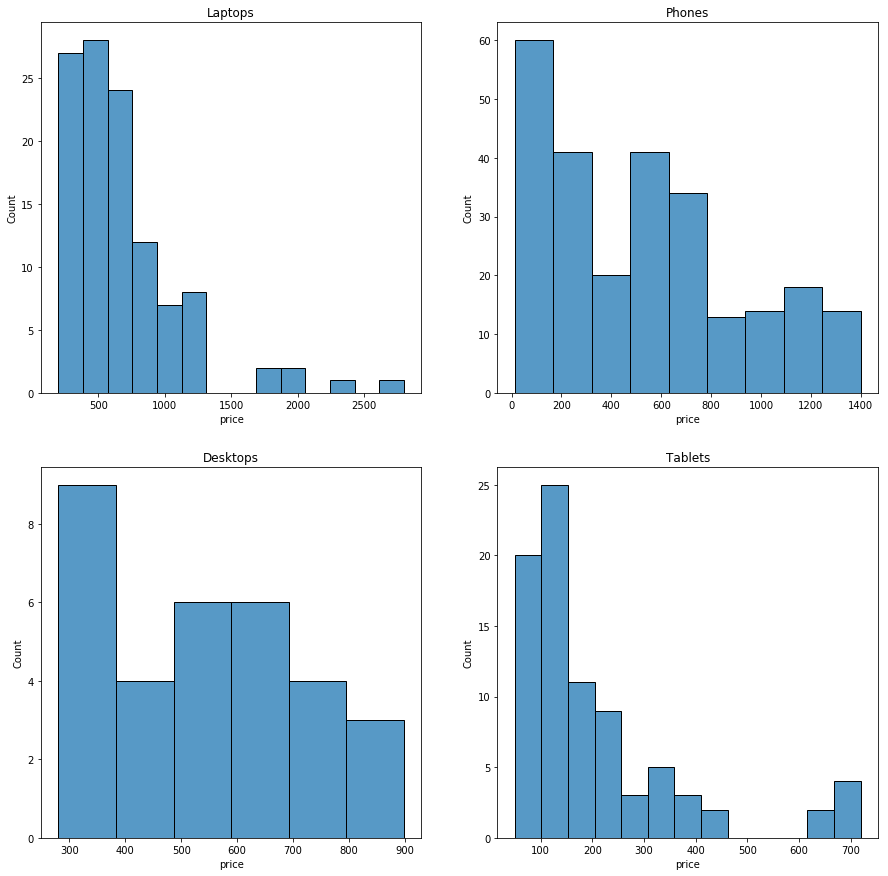

In [18]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['price'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['price'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['price'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['price'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

Text(0.5,1,'Tablets')

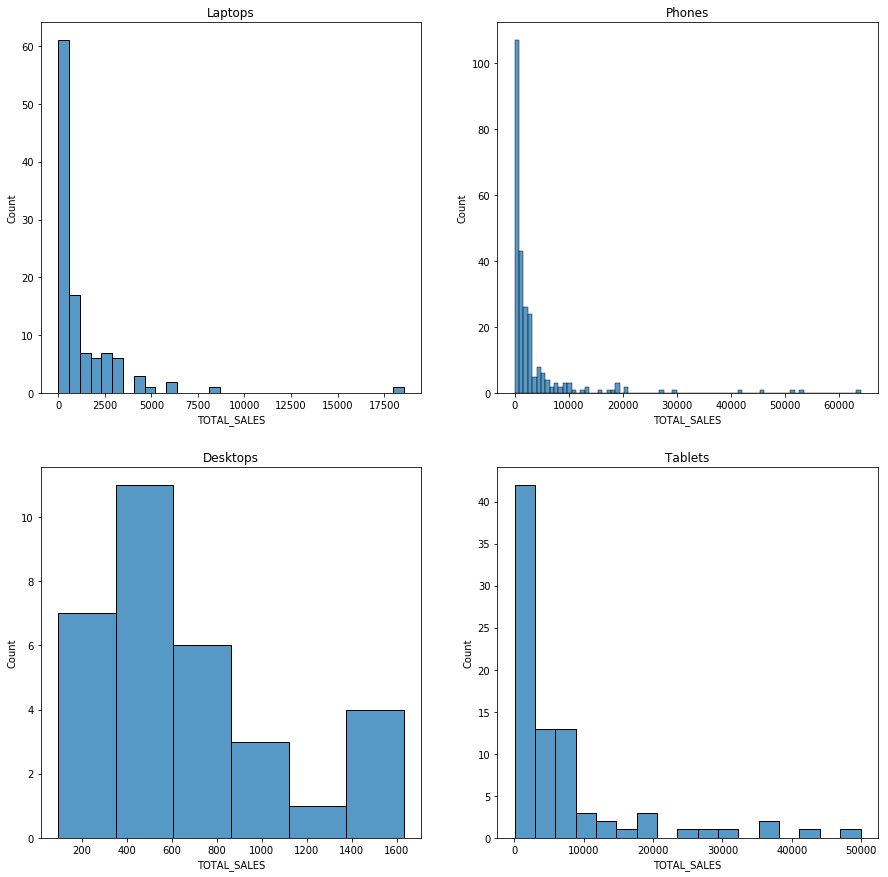

In [21]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['TOTAL_SALES'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['TOTAL_SALES'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['TOTAL_SALES'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['TOTAL_SALES'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

Text(0.5,1,'Tablets')

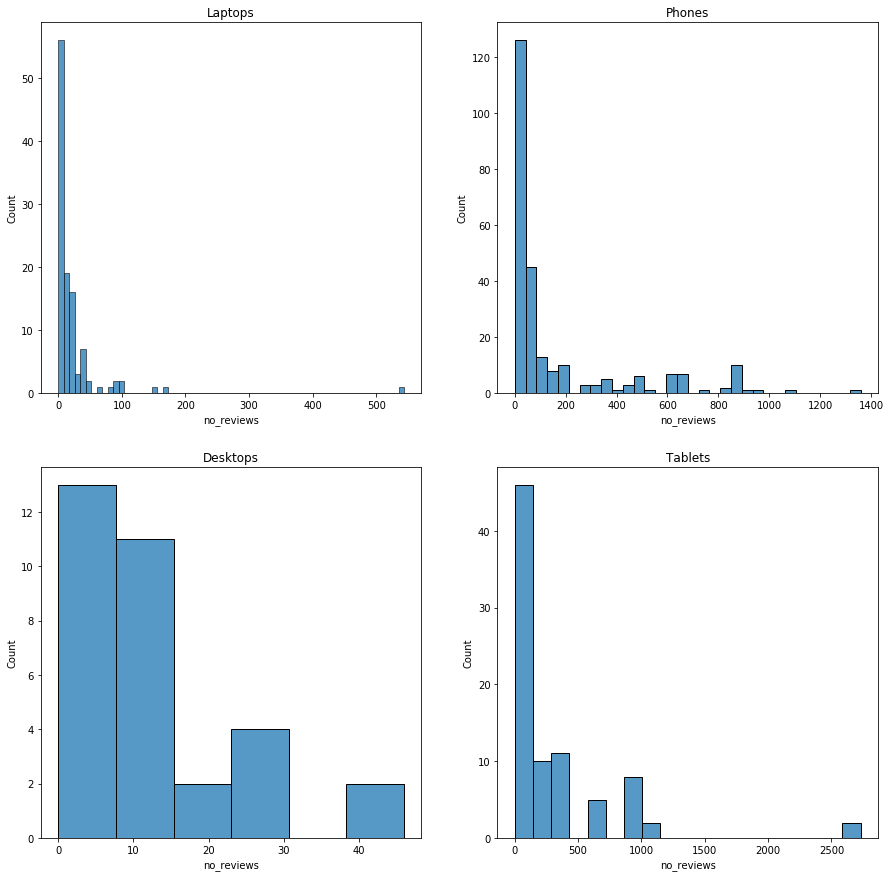

In [15]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['no_reviews'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['no_reviews'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['no_reviews'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['no_reviews'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')
#plt.tight_layout()

Text(0.5,1,'Tablets')

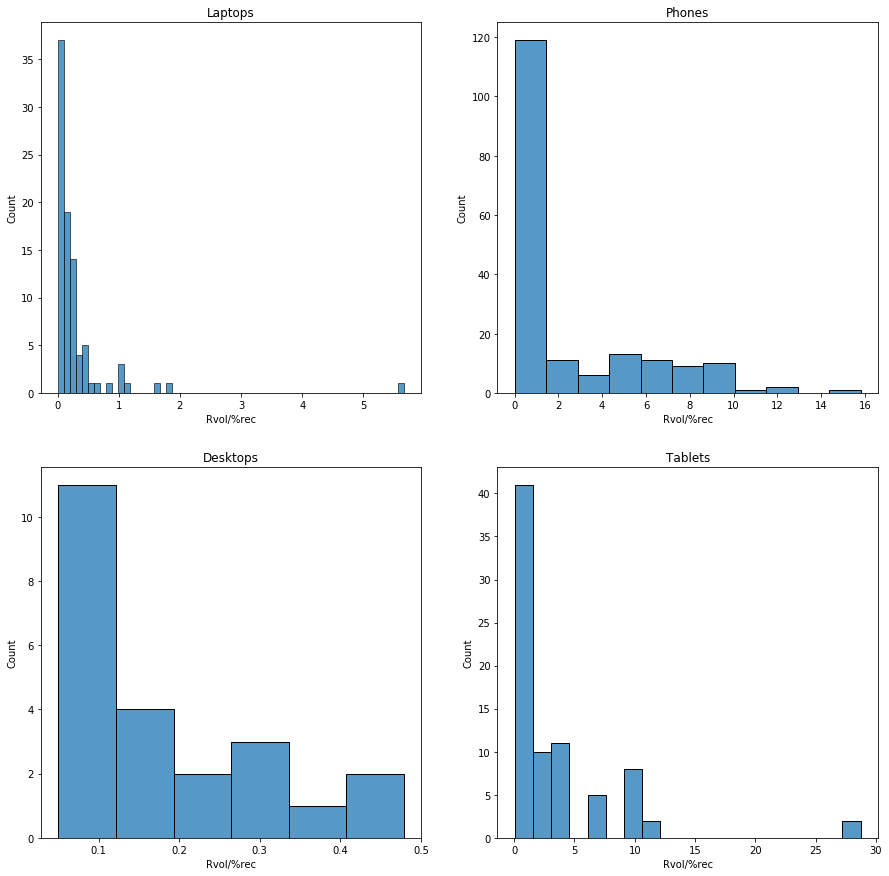

In [17]:

f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['Rvol/%rec'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['Rvol/%rec'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['Rvol/%rec'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['Rvol/%rec'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

Text(0.5,1,'Tablets')

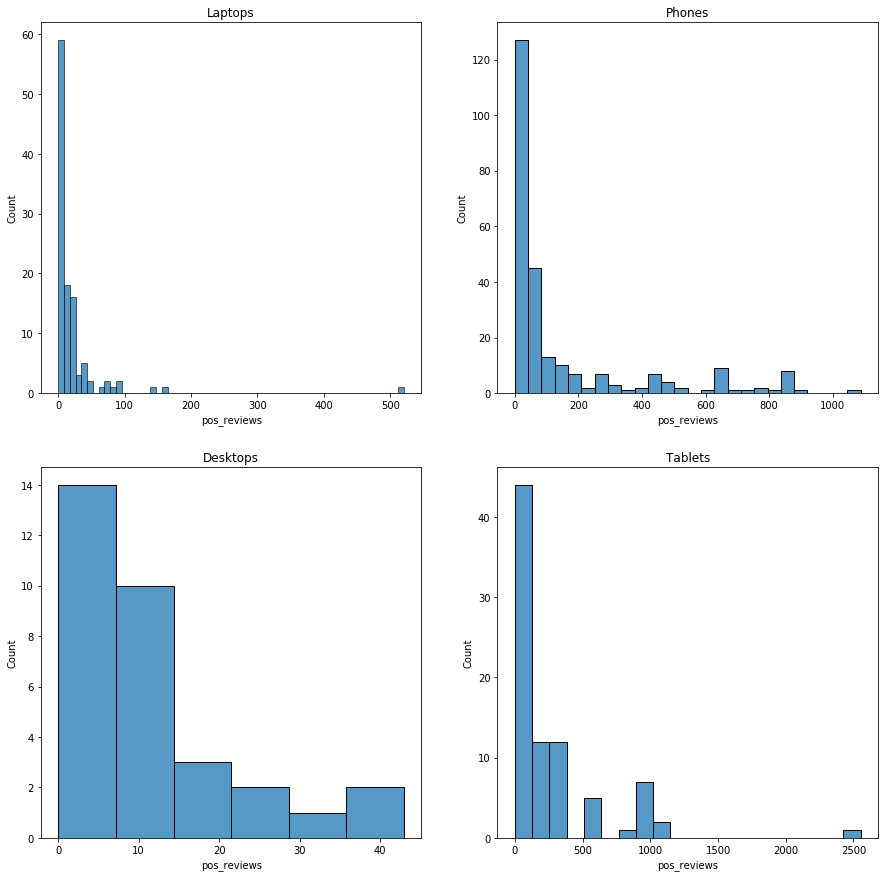

In [16]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['pos_reviews'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['pos_reviews'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['pos_reviews'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['pos_reviews'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

## Scaling

In [91]:
lX = laptops
pX = phones
tX = tablets
dX = desktops

In [92]:
lX = lX.select_dtypes(include=['float', 'int64','int32'])
lX['price/Rvol'] = lX['price/Rvol'].replace(np.inf, lX['price/Rvol'].median())
lX = (lX-lX.mean())/lX.std()

In [93]:
pX = pX.select_dtypes(include=['float', 'int64','int32'])
pX['price/Rvol'] = pX['price/Rvol'].replace(np.inf, pX['price/Rvol'].median())
pX = (pX-pX.mean())/pX.std()

In [94]:
tX = tX.select_dtypes(include=['float', 'int64','int32'])
tX['price/Rvol'] = tX['price/Rvol'].replace(np.inf, tX['price/Rvol'].median())
tX = (tX-tX.mean())/tX.std()

In [95]:
dX = dX.select_dtypes(include=['float', 'int64','int32'])
dX['price/Rvol'] = dX['price/Rvol'].replace(np.inf, dX['price/Rvol'].median())
dX = (dX-dX.mean())/dX.std()

In [46]:
def evaluate_clusters(
    predicted_y,
    real_y,
    qbinned_y,
 
):
    """Evaluates clustering results, uses silouette and rand if specified. Cannot be used with DBSCAN"""
    f, axes = plt.subplots(2,1, figsize=(10,15))
    sns.kdeplot(predicted_y, real_y.astype(int), shade=True,shade_lowest=True,cbar=True, ax=axes[0])
    axes[0].set_title('Cluster labels with total sales')
    sns.kdeplot(predicted_y, qbinned_y.astype(int), shade=True, shade_lowest=True, cbar=True, ax=axes[1])
    axes[1].set_title('Cluster labels with quantile binned sales')

## TOP 3 features

## laptops

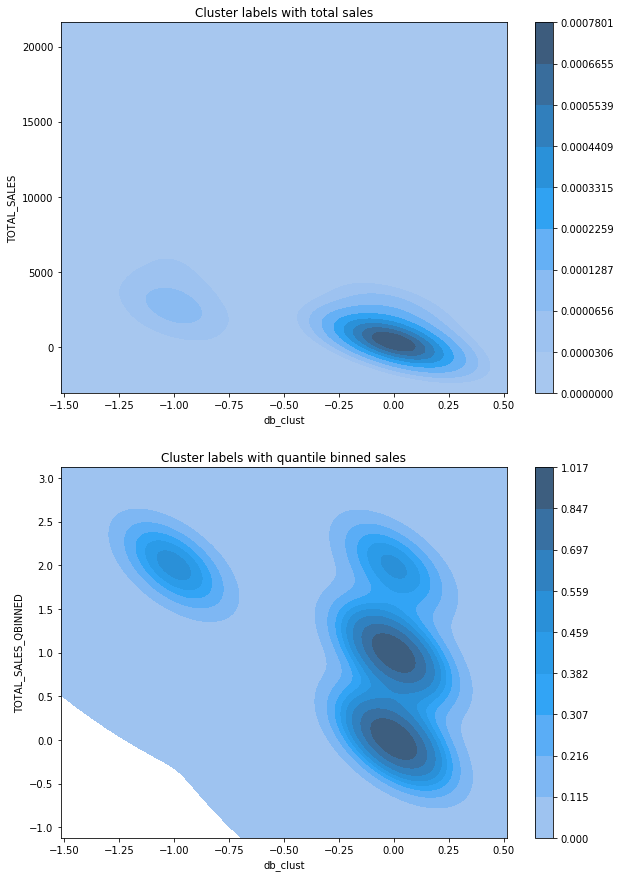

In [100]:
lX['Rvol/%rec'] = lX['Rvol/%rec'].replace(np.nan, lX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=0.25, min_samples=(len(lX))/4)
db_clust = dbscan_model.fit_predict(lX[['no_reviews','Rvol/%rec','pos_reviews']])
laptops['db_clust'] = pd.Series(db_clust, index=laptops.index)
evaluate_clusters(laptops['db_clust'] ,laptops['TOTAL_SALES'],  laptops['TOTAL_SALES_QBINNED'])

In [101]:
cluster_intelligence.cluster_report(lX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,19,NaN
0,0,93,[1.0] (pos_reviews <= -0.20513731241226196)[0.62] (pos_reviews > -0.20513731241226196)


In [104]:
print(laptops.loc[laptops.db_clust==-1]['TOTAL_SALES'].mean())
print(laptops.loc[laptops.db_clust==-0]['TOTAL_SALES'].mean())

4338.578947368421
650.9032258064516


## phones

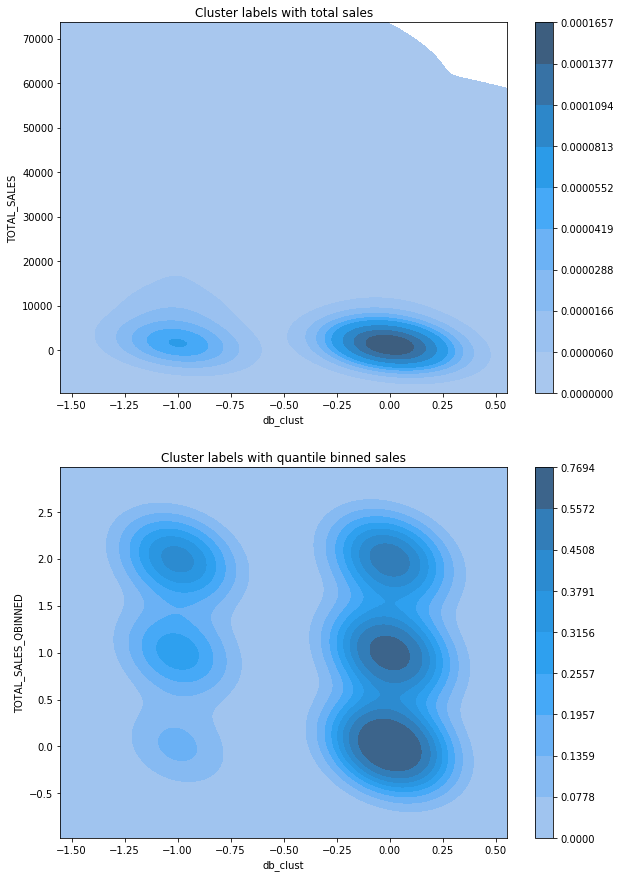

In [102]:
pX['Rvol/%rec'] = pX['Rvol/%rec'].replace(np.nan, pX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=0.25, min_samples=(len(pX))/4)
db_clust = dbscan_model.fit_predict(pX[['no_reviews','Rvol/%rec','pos_reviews']])
phones['db_clust'] = pd.Series(db_clust, index=phones.index)
evaluate_clusters(phones['db_clust'] ,phones['TOTAL_SALES'],  phones['TOTAL_SALES_QBINNED'])

In [103]:
cluster_intelligence.cluster_report(pX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,79,[1.0] (pos_reviews > -0.21051328629255295)
0,0,176,[1.0] (pos_reviews <= -0.21051328629255295)


In [105]:
print(phones.loc[phones.db_clust==-1]['TOTAL_SALES'].mean())
print(phones.loc[phones.db_clust==-0]['TOTAL_SALES'].mean())

6893.911392405063
2243.215909090909


## desktops

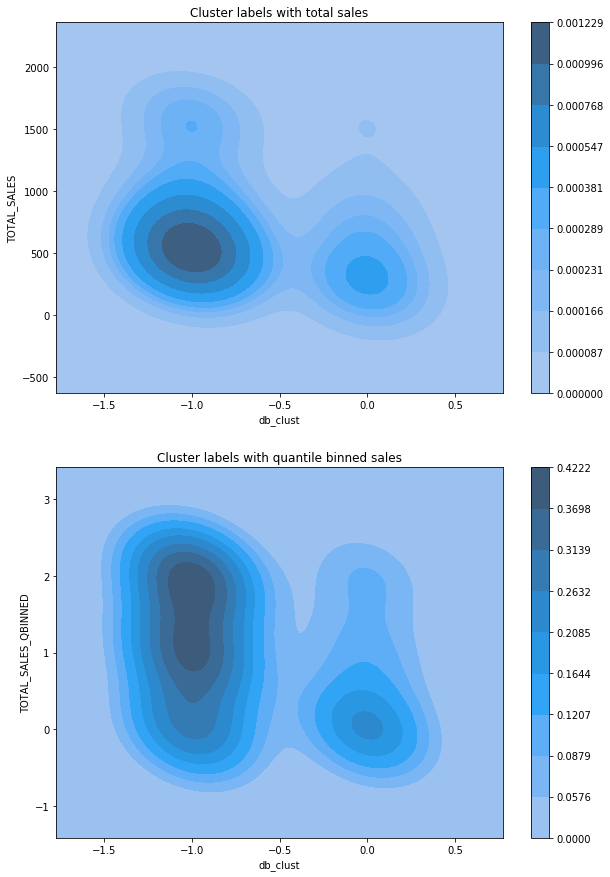

In [106]:
dX['Rvol/%rec'] = dX['Rvol/%rec'].replace(np.nan, dX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=0.25, min_samples=(len(dX))/4)
db_clust = dbscan_model.fit_predict(dX[['no_reviews','Rvol/%rec','pos_reviews']])
desktops['db_clust'] = pd.Series(db_clust, index=desktops.index)
evaluate_clusters(desktops['db_clust'] ,desktops['TOTAL_SALES'],  desktops['TOTAL_SALES_QBINNED'])

In [107]:
cluster_intelligence.cluster_report(dX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
0,-1,23,[0.71875] ALL
1,0,9,NaN


In [108]:
print(desktops.loc[desktops.db_clust==-1]['TOTAL_SALES'].mean())
print(desktops.loc[desktops.db_clust==-0]['TOTAL_SALES'].mean())

742.4347826086956
570.4444444444445


## tablets

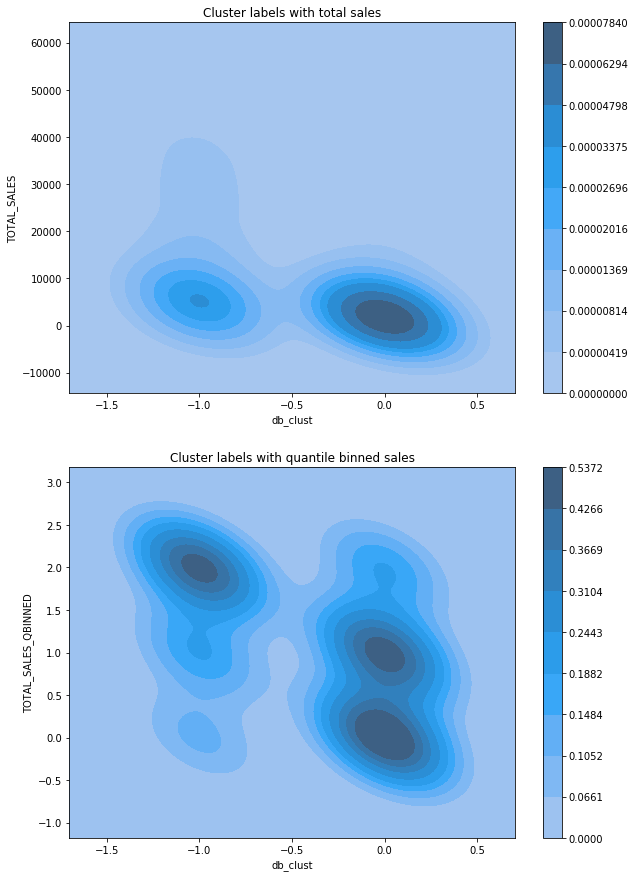

In [109]:
tX['Rvol/%rec'] = tX['Rvol/%rec'].replace(np.nan, tX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=0.25, min_samples=(len(tX))/4)
db_clust = dbscan_model.fit_predict(tX[['no_reviews','Rvol/%rec','pos_reviews']])
tablets['db_clust'] = pd.Series(db_clust, index=tablets.index)
evaluate_clusters(tablets['db_clust'] ,tablets['TOTAL_SALES'],  tablets['TOTAL_SALES_QBINNED'])

In [110]:
cluster_intelligence.cluster_report(tX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,33,NaN
0,0,51,[0.6071428571428571] ALL


In [111]:
print(tablets.loc[tablets.db_clust==-1]['TOTAL_SALES'].mean())
print(tablets.loc[tablets.db_clust==-0]['TOTAL_SALES'].mean())

11444.545454545454
3658.3333333333335
